In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
import ipywidgets as widgets
from IPython.display import display
import folium
from folium.plugins import HeatMap
from folium.plugins import MarkerCluster
from ipywidgets import interact, Dropdown
import os


In [6]:
import pandas as pd

# Load the dataset from the Final Datasets folder
file_path = 'Final Datasets/N1_Cleaned_fueldata.csv'
data = pd.read_csv(file_path)

# Display the first few rows and summary information
data_info = data.info()
data_head = data.head()

data_info, data_head


# Putting data into another variable
data_cleaned = data


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 972174 entries, 0 to 972173
Data columns (total 12 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   PUBLISH_DATE         972174 non-null  object 
 1   TRADING_NAME         972174 non-null  object 
 2   BRAND_DESCRIPTION    972174 non-null  object 
 3   PRODUCT_DESCRIPTION  972174 non-null  object 
 4   PRODUCT_PRICE        972174 non-null  float64
 5   ADDRESS              972174 non-null  object 
 6   LOCATION             972174 non-null  object 
 7   POSTCODE             972174 non-null  int64  
 8   AREA_DESCRIPTION     972174 non-null  object 
 9   REGION_DESCRIPTION   972174 non-null  object 
 10  latitude             972174 non-null  float64
 11  longitude            972174 non-null  float64
dtypes: float64(3), int64(1), object(8)
memory usage: 89.0+ MB


In [7]:
# Load the weather CSV file
weather_file_path = 'Final Datasets/N8_Weather_Conditions.csv'  # Replace with your actual file path
weather_df = pd.read_csv(weather_file_path)

# Inspect the first few rows and columns of the weather data
print(weather_df.head())

  SUBURB        DATE  POSTCODE  max_temp  min_temp  avg_temp  rainfall
0  ASCOT  2020-01-01      6104      29.9      21.1      25.0       0.4
1  ASCOT  2020-01-02      6104      29.9      21.3      25.2       0.6
2  ASCOT  2020-01-03      6104      30.2      20.4      24.9       0.0
3  ASCOT  2020-01-04      6104      31.0      19.1      24.8       0.0
4  ASCOT  2020-01-05      6104      31.4      19.7      25.4       0.0


In [8]:
# Convert 'DATE' column to datetime if it isn't already
weather_df['DATE'] = pd.to_datetime(weather_df['DATE'], format='%Y-%m-%d')

# Check for missing values in the weather data
print(weather_df.isnull().sum())



SUBURB      0
DATE        0
POSTCODE    0
max_temp    0
min_temp    0
avg_temp    0
rainfall    0
dtype: int64


In [9]:
# Downcast numeric types in the fuel price data
data_cleaned['PRODUCT_PRICE'] = pd.to_numeric(data_cleaned['PRODUCT_PRICE'], downcast='float')

# Downcast numeric types in the weather data
weather_df['max_temp'] = pd.to_numeric(weather_df['max_temp'], downcast='float')
weather_df['min_temp'] = pd.to_numeric(weather_df['min_temp'], downcast='float')
weather_df['avg_temp'] = pd.to_numeric(weather_df['avg_temp'], downcast='float')
weather_df['rainfall'] = pd.to_numeric(weather_df['rainfall'], downcast='float')


In [12]:
# Specify the directory where the chunk files are saved
chunk_directory = 'Heat Map Data/Chunk_Files' 

# List of all the chunk files
chunk_files = [f for f in os.listdir(chunk_directory) if f.startswith('merged_chunk')]

# Combine all the chunk files into one DataFrame
combined_df = pd.concat([pd.read_csv(os.path.join(chunk_directory, file)) for file in chunk_files])

# Save the combined result
#  to a new CSV
combined_df.to_csv('combined_fuel_weather_data.csv', index=False)

# Inspect the combined data
print(combined_df.head())

  PUBLISH_DATE       TRADING_NAME BRAND_DESCRIPTION PRODUCT_DESCRIPTION  \
0   2020-01-01     7-Eleven Ascot          7-Eleven                 ULP   
1   2020-01-01     7-Eleven Ascot          7-Eleven                 ULP   
2   2020-01-01     7-Eleven Ascot          7-Eleven                 ULP   
3   2020-01-01  7-Eleven Balcatta          7-Eleven                 ULP   
4   2020-01-01     7-Eleven Balga          7-Eleven                 ULP   

   PRODUCT_PRICE                ADDRESS  LOCATION  POSTCODE AREA_DESCRIPTION  \
0          156.5  194 Great Eastern Hwy     ASCOT      6104   South of River   
1          156.5  194 Great Eastern Hwy     ASCOT      6104   South of River   
2          156.5  194 Great Eastern Hwy     ASCOT      6104   South of River   
3          153.9        174 Balcatta Rd  BALCATTA      6021   North of River   
4          157.5        102 Princess Rd     BALGA      6061   North of River   

  REGION_DESCRIPTION   latitude   longitude  YEAR     SUBURB        

## 	Hypothesis : Temperature effects Fuel Prices 

In [14]:
# Filter data to focus on relevant columns for temperature and fuel prices
correlation_data = combined_df[['max_temp', 'min_temp', 'avg_temp', 'PRODUCT_PRICE']]

# Calculate Pearson correlation coefficients
correlation_matrix = correlation_data.corr()

# Display the correlation matrix
print(correlation_matrix)

               max_temp  min_temp  avg_temp  PRODUCT_PRICE
max_temp       1.000000  0.831508  0.960499       0.027935
min_temp       0.831508  1.000000  0.943538      -0.012066
avg_temp       0.960499  0.943538  1.000000       0.005624
PRODUCT_PRICE  0.027935 -0.012066  0.005624       1.000000


No Strong Correlation: All temperature variables (max, min, and avg) show almost zero correlation with fuel prices. This implies that temperature alone doesn’t seem to have a direct or strong linear effect on the fuel prices in  dataset.

C:\Users\User\AppData\Local\Temp\ipykernel_25720\115008855.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  binned_data = combined_df.groupby(weather_bins)['PRODUCT_PRICE'].mean()
C:\Users\User\AppData\Local\Temp\ipykernel_25720\115008855.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['rolling_avg_price'] = filtered_data['PRODUCT_PRICE'].rolling(window=7).mean()


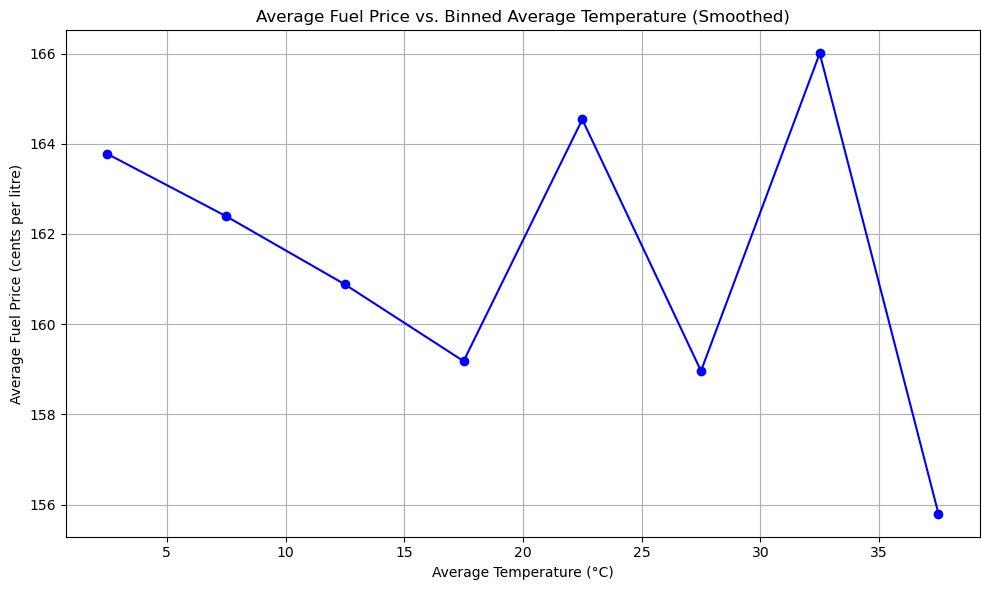

In [13]:

# Bin temperatures into ranges of 5°C
weather_bins = pd.cut(combined_df['avg_temp'], bins=[0, 5, 10, 15, 20, 25, 30, 35, 40], right=False)

#  Group data by temperature bins and calculate average fuel price in each bin
binned_data = combined_df.groupby(weather_bins)['PRODUCT_PRICE'].mean()

# Filter out outliers (fuel prices below 100 and above 220 cents per litre)
filtered_data = combined_df[(combined_df['PRODUCT_PRICE'] >= 100) & (combined_df['PRODUCT_PRICE'] <= 220)]

# Apply rolling average for smoother trends (7-day window)
filtered_data['rolling_avg_price'] = filtered_data['PRODUCT_PRICE'].rolling(window=7).mean()

# Re-plot the data with smoother trend line
plt.figure(figsize=(10, 6))
plt.plot(binned_data.index.categories.mid, binned_data, marker='o', linestyle='-', color='blue')
plt.title('Average Fuel Price vs. Binned Average Temperature (Smoothed)')
plt.xlabel('Average Temperature (°C)')
plt.ylabel('Average Fuel Price (cents per litre)')
plt.grid(True)
plt.tight_layout()
plt.show()

In [15]:
# Convert 'PUBLISH_DATE' to datetime format if not already done
combined_df['PUBLISH_DATE'] = pd.to_datetime(combined_df['PUBLISH_DATE'])

# Extract year and week number from the 'PUBLISH_DATE' column
combined_df['Year'] = combined_df['PUBLISH_DATE'].dt.year
combined_df['Week'] = combined_df['PUBLISH_DATE'].dt.isocalendar().week

# Group by 'Year' and 'Week' and calculate the weekly average for fuel price and temperature
weekly_averages = combined_df.groupby(['Year', 'Week']).agg({
    'PRODUCT_PRICE': 'mean', 
    'avg_temp': 'mean'
}).reset_index()

# Preview the results
print(weekly_averages.head())

   Year  Week  PRODUCT_PRICE   avg_temp
0  2020     1     145.431592  21.218255
1  2020     2     145.123464  24.025523
2  2020     3     144.051891  25.123337
3  2020     4     141.776317  22.969639
4  2020     5     139.574806  23.679392


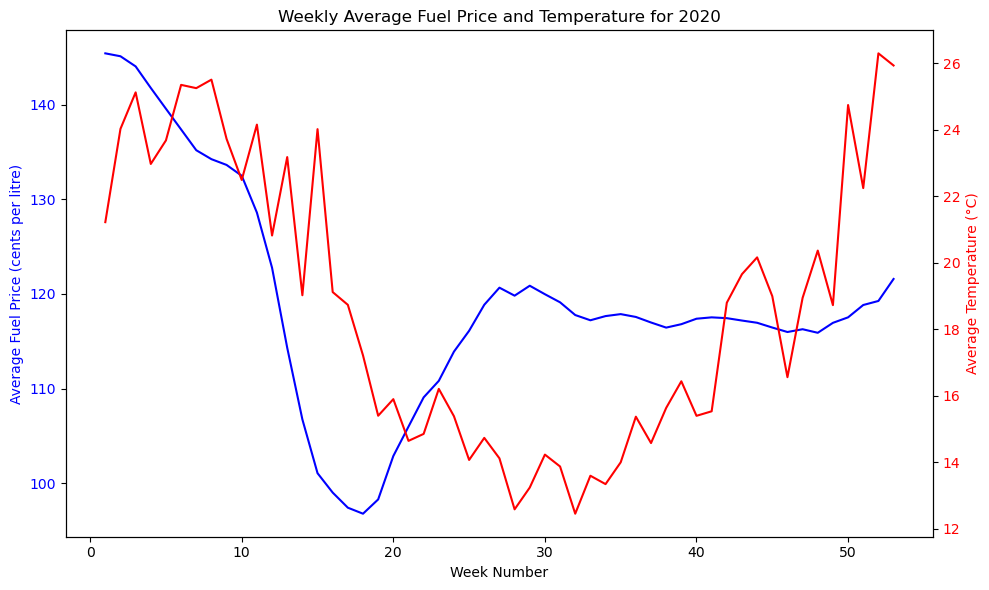

In [16]:
# Plot the data for a selected year, e.g., 2020
selected_year = 2020
weekly_data_selected_year = weekly_averages[weekly_averages['Year'] == selected_year]

# Create a figure and axis
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot the average fuel price on the left y-axis
ax1.set_xlabel('Week Number')
ax1.set_ylabel('Average Fuel Price (cents per litre)', color='blue')
ax1.plot(weekly_data_selected_year['Week'], weekly_data_selected_year['PRODUCT_PRICE'], color='blue', label='Fuel Price')
ax1.tick_params(axis='y', labelcolor='blue')

# Create a second y-axis for average temperature
ax2 = ax1.twinx()
ax2.set_ylabel('Average Temperature (°C)', color='red')
ax2.plot(weekly_data_selected_year['Week'], weekly_data_selected_year['avg_temp'], color='red', label='Temperature')
ax2.tick_params(axis='y', labelcolor='red')

# Title and layout
plt.title(f'Weekly Average Fuel Price and Temperature for {selected_year}')
fig.tight_layout()

# Show the plot
plt.show()


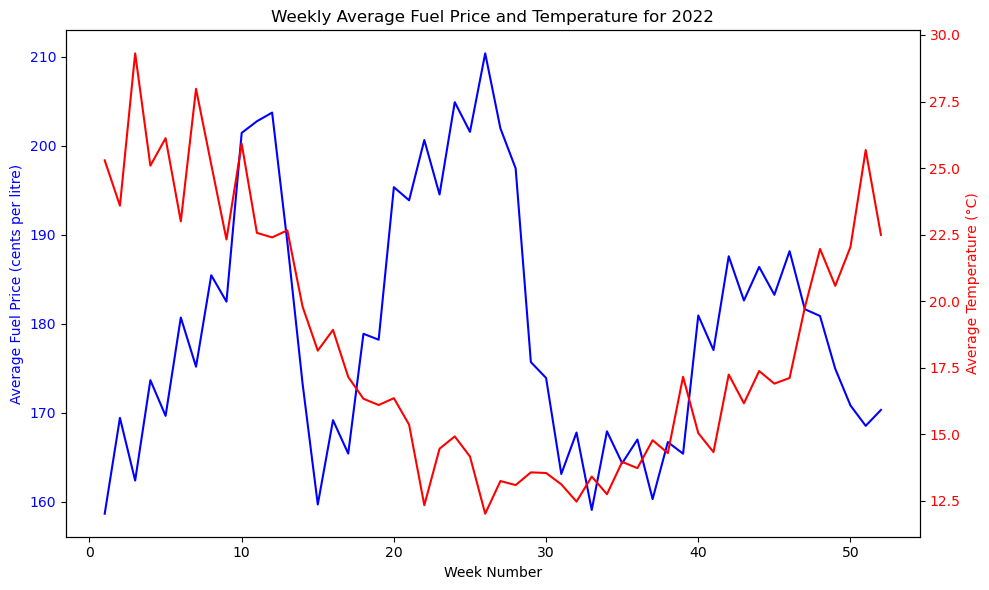

In [20]:
# Plot the data for a selected year, e.g., 2020
selected_year = 2022
weekly_data_selected_year = weekly_averages[weekly_averages['Year'] == selected_year]

# Create a figure and axis
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot the average fuel price on the left y-axis
ax1.set_xlabel('Week Number')
ax1.set_ylabel('Average Fuel Price (cents per litre)', color='blue')
ax1.plot(weekly_data_selected_year['Week'], weekly_data_selected_year['PRODUCT_PRICE'], color='blue', label='Fuel Price')
ax1.tick_params(axis='y', labelcolor='blue')

# Create a second y-axis for average temperature
ax2 = ax1.twinx()
ax2.set_ylabel('Average Temperature (°C)', color='red')
ax2.plot(weekly_data_selected_year['Week'], weekly_data_selected_year['avg_temp'], color='red', label='Temperature')
ax2.tick_params(axis='y', labelcolor='red')

# Title and layout
plt.title(f'Weekly Average Fuel Price and Temperature for {selected_year}')
fig.tight_layout()

# Show the plot
plt.show()


In [17]:
# Group data by Year and Week to calculate statistics
weekly_stats = combined_df.groupby(['Year', 'Week']).agg({
    'PRODUCT_PRICE': ['min', 'max', 'median'],
    'avg_temp': ['min', 'max', 'median']
}).reset_index()

# Flatten column names for easier use
weekly_stats.columns = ['Year', 'Week', 'Fuel_Price_Min', 'Fuel_Price_Max', 'Fuel_Price_Median', 
                        'Temp_Min', 'Temp_Max', 'Temp_Median']

# Preview the results
print(weekly_stats.head())


   Year  Week  Fuel_Price_Min  Fuel_Price_Max  Fuel_Price_Median  Temp_Min  \
0  2020     1           128.7           162.9              143.9      11.4   
1  2020     2           128.3           165.9              143.7      13.2   
2  2020     3           127.7           165.9              141.9      12.0   
3  2020     4           126.7           165.9              139.9      13.9   
4  2020     5           125.3           163.9              136.9      13.8   

   Temp_Max  Temp_Median  
0      34.6         20.2  
1      31.2         24.3  
2      31.5         25.5  
3      31.8         22.8  
4      34.1         22.8  


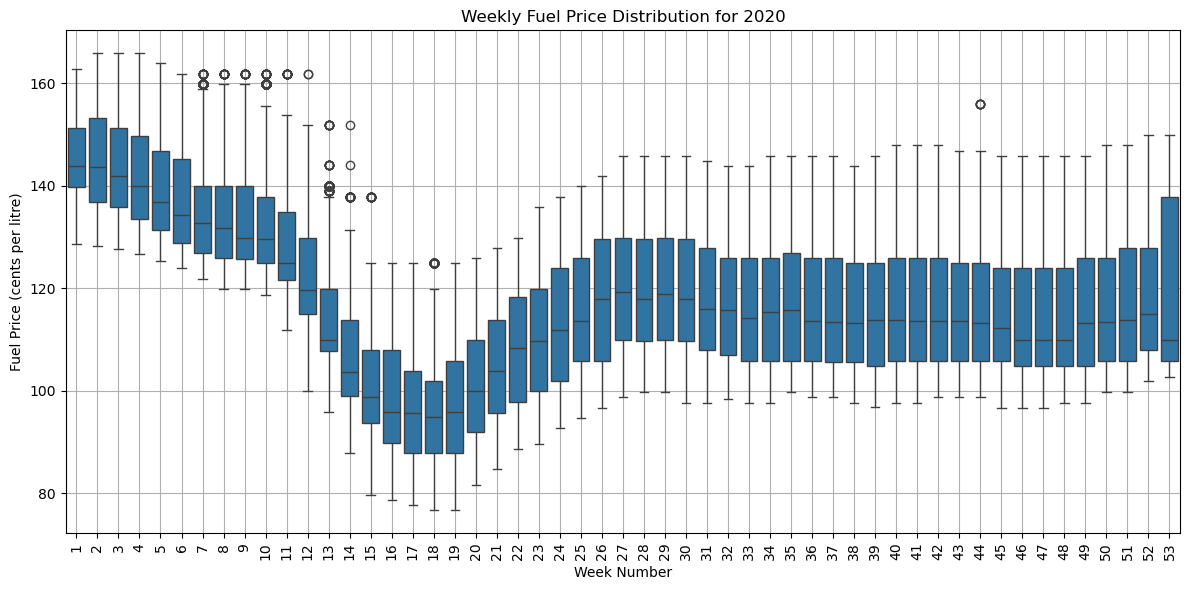

In [18]:
# Filter data for a selected year
selected_year = 2020
yearly_data = combined_df[combined_df['PUBLISH_DATE'].dt.year == selected_year]

# Create a boxplot for fuel prices for each week
plt.figure(figsize=(12, 6))
sns.boxplot(x=yearly_data['PUBLISH_DATE'].dt.isocalendar().week, y=yearly_data['PRODUCT_PRICE'])
plt.title(f'Weekly Fuel Price Distribution for {selected_year}')
plt.xlabel('Week Number')
plt.ylabel('Fuel Price (cents per litre)')
plt.xticks(rotation=90)
plt.grid(True)
plt.tight_layout()
plt.show()


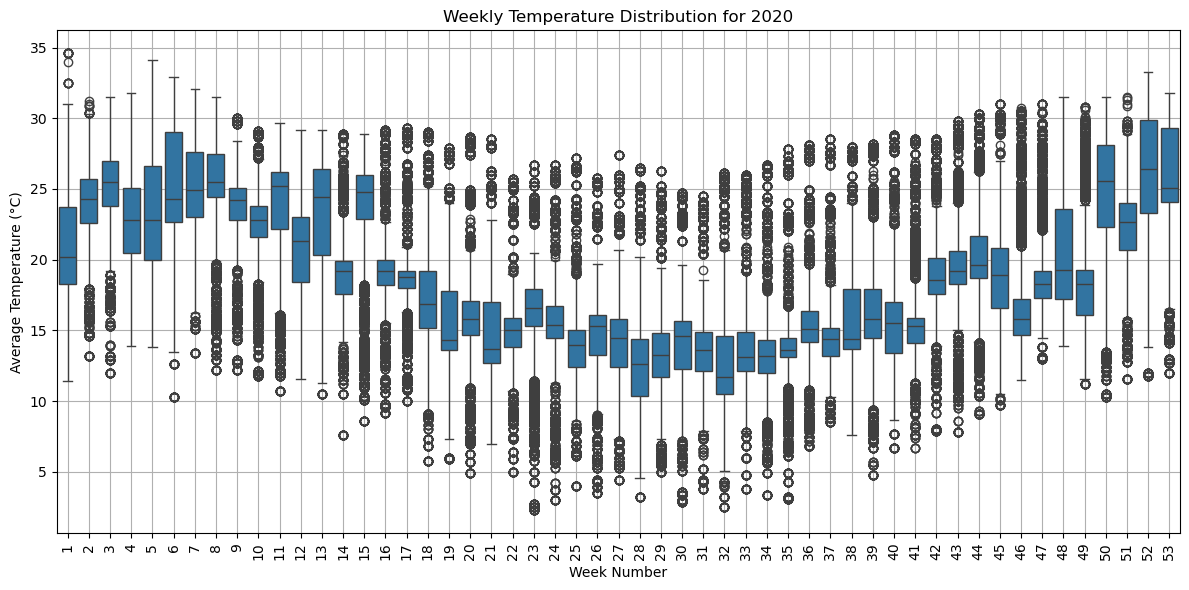

In [19]:
# Create a boxplot for average temperature for each week
plt.figure(figsize=(12, 6))
sns.boxplot(x=yearly_data['PUBLISH_DATE'].dt.isocalendar().week, y=yearly_data['avg_temp'])
plt.title(f'Weekly Temperature Distribution for {selected_year}')
plt.xlabel('Week Number')
plt.ylabel('Average Temperature (°C)')
plt.xticks(rotation=90)
plt.grid(True)
plt.tight_layout()
plt.show()


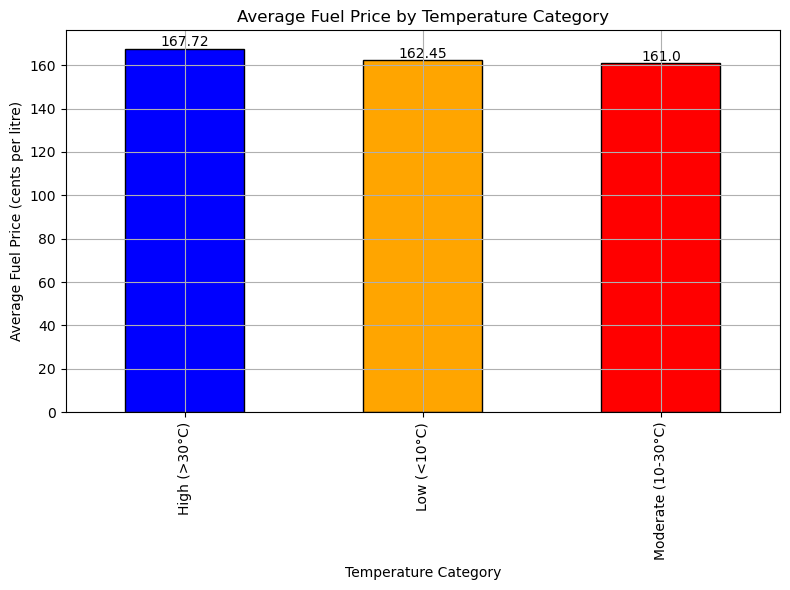

In [21]:

# Create temperature categories (low, moderate, high)
def categorize_temperature(temp):
    if temp < 10:
        return 'Low (<10°C)'
    elif 10 <= temp <= 30:
        return 'Moderate (10-30°C)'
    else:
        return 'High (>30°C)'

# Apply the temperature categories to the data
combined_df['temp_category'] = combined_df['avg_temp'].apply(categorize_temperature)

# Step 2: Calculate average fuel price for each temperature category
avg_price_per_temp_category = combined_df.groupby('temp_category')['PRODUCT_PRICE'].mean()

# Step 3: Plot the average fuel prices for each temperature category
plt.figure(figsize=(8, 6))
avg_price_per_temp_category.plot(kind='bar', color=['blue', 'orange', 'red'], edgecolor='black')

plt.title('Average Fuel Price by Temperature Category')
plt.xlabel('Temperature Category')
plt.ylabel('Average Fuel Price (cents per litre)')
plt.grid(True)
plt.tight_layout()

# Display the values on top of the bars
for index, value in enumerate(avg_price_per_temp_category):
    plt.text(index, value + 1, round(value, 2), ha='center')

plt.show()


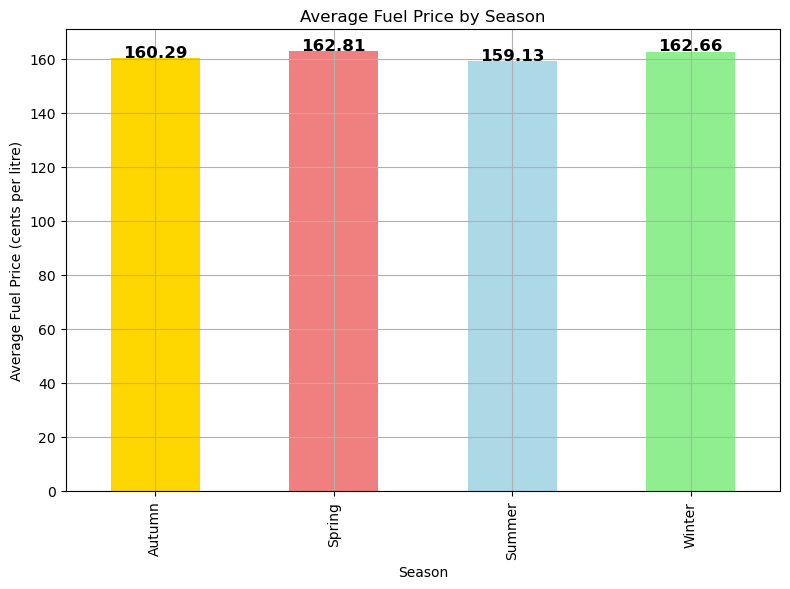

In [22]:
# Ensure 'PUBLISH_DATE' is in datetime format
combined_df['PUBLISH_DATE'] = pd.to_datetime(combined_df['PUBLISH_DATE'], format='%Y-%m-%d')

# Define a function to assign seasons based on the month
def get_season(month):
    if month in [12, 1, 2]:
        return 'Summer'
    elif month in [3, 4, 5]:
        return 'Autumn'
    elif month in [6, 7, 8]:
        return 'Winter'
    else:
        return 'Spring'

# Create a new column 'Season' in the dataframe based on 'PUBLISH_DATE'
combined_df['Season'] = combined_df['PUBLISH_DATE'].dt.month.apply(get_season)

# Calculate the average fuel price for each season
seasonal_avg_prices = combined_df.groupby('Season')['PRODUCT_PRICE'].mean()

# Plotting the average fuel price by season
plt.figure(figsize=(8, 6))
seasonal_avg_prices.plot(kind='bar', color=['gold', 'lightcoral', 'lightblue', 'lightgreen'])
plt.title('Average Fuel Price by Season')
plt.xlabel('Season')
plt.ylabel('Average Fuel Price (cents per litre)')
plt.grid(True)
plt.tight_layout()

# Annotating the bars with the average price values
for i, price in enumerate(seasonal_avg_prices):
    plt.text(i, price + 0.5, f'{price:.2f}', ha='center', fontsize=12, fontweight='bold')

plt.show()


In [23]:
# Calculate min, max, and median fuel prices for each season
seasonal_stats = combined_df.groupby('Season').agg({
    'PRODUCT_PRICE': ['min', 'max', 'median']
}).reset_index()

# Flatten column names
seasonal_stats.columns = ['Season', 'Min_Fuel_Price', 'Max_Fuel_Price', 'Median_Fuel_Price']

# Preview the seasonal statistics
print(seasonal_stats)


   Season  Min_Fuel_Price  Max_Fuel_Price  Median_Fuel_Price
0  Autumn            76.7           234.8              169.9
1  Spring            96.7           235.9              169.7
2  Summer            97.7           223.9              163.9
3  Winter            89.7           239.9              167.9


C:\Users\User\AppData\Local\Temp\ipykernel_25720\2925564144.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  box_plot = sns.boxplot(x=combined_df['Season'], y=combined_df['PRODUCT_PRICE'],


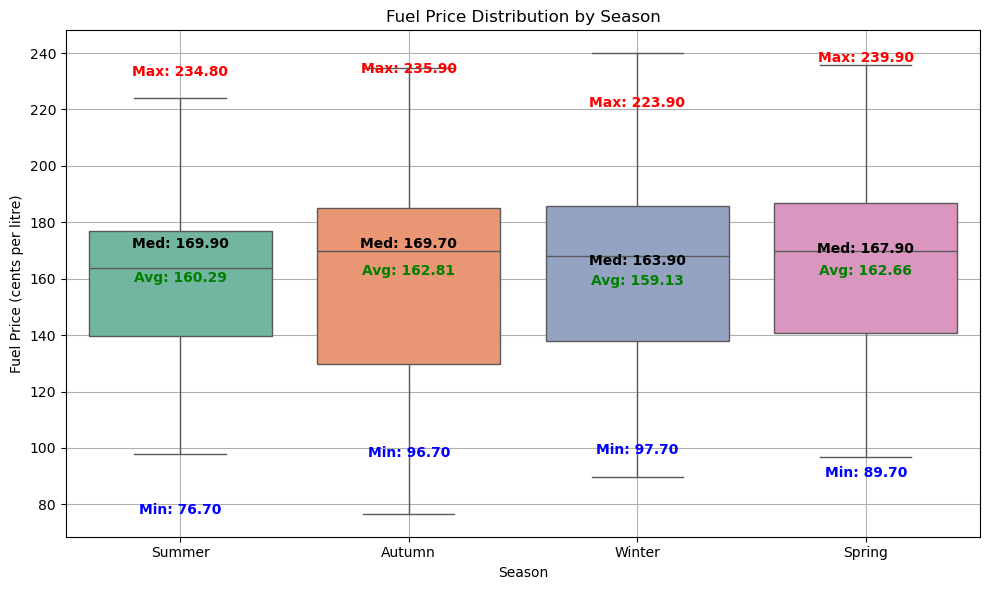

In [26]:
# Calculate stats for labeling (min, max, avg, median)
season_stats = combined_df.groupby('Season')['PRODUCT_PRICE'].agg(['min', 'max', 'mean', 'median'])

# Create a box plot to visualize fuel price distribution by season
plt.figure(figsize=(10, 6))
box_plot = sns.boxplot(x=combined_df['Season'], y=combined_df['PRODUCT_PRICE'], 
                       order=['Summer', 'Autumn', 'Winter', 'Spring'], palette='Set2')

plt.title('Fuel Price Distribution by Season')
plt.xlabel('Season')
plt.ylabel('Fuel Price (cents per litre)')
plt.grid(True)

# Add labels for min, max, mean, and median values
for i, season in enumerate(season_stats.index):
    stats = season_stats.loc[season]
    # Min value
    plt.text(i, stats['min'] - 1, f'Min: {stats["min"]:.2f}', ha='center', va='bottom', color='blue', fontsize=10, fontweight='bold')
    # Max value
    plt.text(i, stats['max'] + 1, f'Max: {stats["max"]:.2f}', ha='center', va='top', color='red', fontsize=10, fontweight='bold')
    # Mean value
    plt.text(i, stats['mean'], f'Avg: {stats["mean"]:.2f}', ha='center', va='center', color='green', fontsize=10, fontweight='bold')
    # Median value
    plt.text(i, stats['median'], f'Med: {stats["median"]:.2f}', ha='center', va='bottom', color='black', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()


## 	Hypothesis : Rainfall Effects Fuel Prices – Accepted

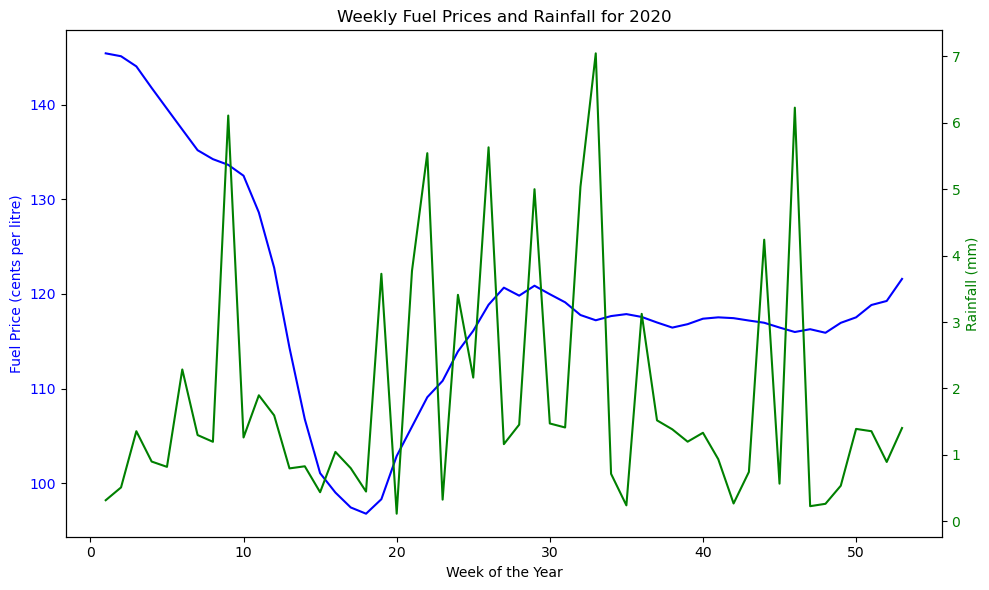

In [33]:
# Apply rolling averages to smooth out noise (7-week window, adjust as needed)
combined_df['Rolling_Fuel_Price'] = combined_df['PRODUCT_PRICE'].rolling(window=7).mean()
combined_df['Rolling_Rainfall'] = combined_df['rainfall'].rolling(window=7).mean()

# Group by year and week to calculate weekly averages (after smoothing)
weekly_data = combined_df.groupby(['Year', 'Week']).agg({
    'Rolling_Fuel_Price': 'mean',
    'Rolling_Rainfall': 'mean'
}).reset_index()

# Select a specific year to focus on (e.g., 2020)
selected_year = 2020
weekly_data_selected_year = weekly_data[weekly_data['Year'] == selected_year]

# Plot both rainfall and fuel prices on the same plot for a selected year
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot smoothed fuel prices on the left y-axis
ax1.set_xlabel('Week of the Year')
ax1.set_ylabel('Fuel Price (cents per litre)', color='blue')
ax1.plot(weekly_data_selected_year['Week'], weekly_data_selected_year['Rolling_Fuel_Price'], color='blue', label='Fuel Price')
ax1.tick_params(axis='y', labelcolor='blue')

# Create a second y-axis for rainfall
ax2 = ax1.twinx()
ax2.set_ylabel('Rainfall (mm)', color='green')
ax2.plot(weekly_data_selected_year['Week'], weekly_data_selected_year['Rolling_Rainfall'], color='green', label='Rainfall')
ax2.tick_params(axis='y', labelcolor='green')

plt.title(f'Weekly Fuel Prices and Rainfall for {selected_year}')
fig.tight_layout()
plt.show()


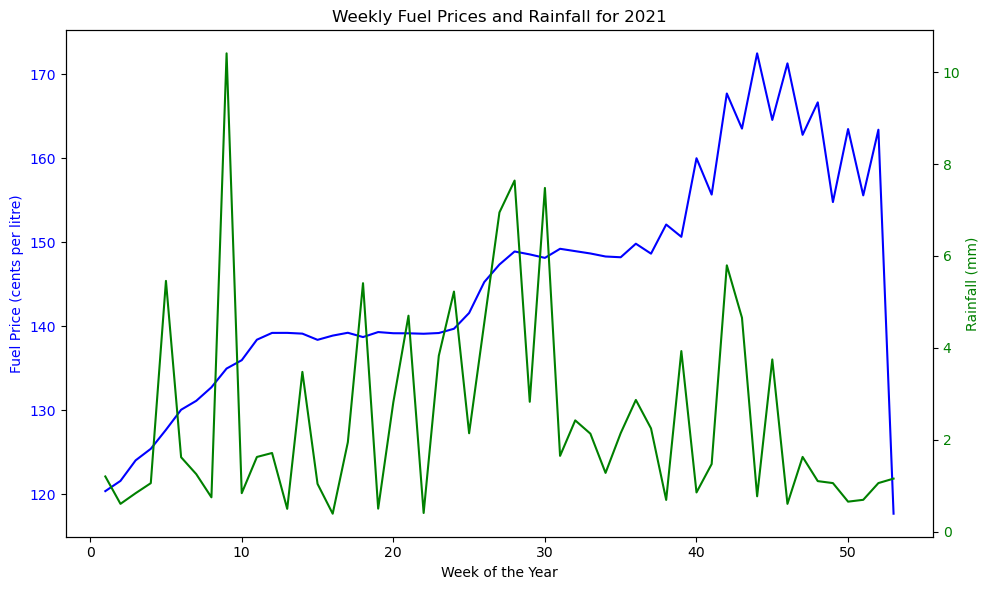

In [34]:

# Apply rolling averages to smooth out noise (7-week window, adjust as needed)
combined_df['Rolling_Fuel_Price'] = combined_df['PRODUCT_PRICE'].rolling(window=7).mean()
combined_df['Rolling_Rainfall'] = combined_df['rainfall'].rolling(window=7).mean()

# Group by year and week to calculate weekly averages (after smoothing)
weekly_data = combined_df.groupby(['Year', 'Week']).agg({
    'Rolling_Fuel_Price': 'mean',
    'Rolling_Rainfall': 'mean'
}).reset_index()

# Select a specific year to focus on (e.g., 2020)
selected_year = 2021
weekly_data_selected_year = weekly_data[weekly_data['Year'] == selected_year]

# Plot both rainfall and fuel prices on the same plot for a selected year
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot smoothed fuel prices on the left y-axis
ax1.set_xlabel('Week of the Year')
ax1.set_ylabel('Fuel Price (cents per litre)', color='blue')
ax1.plot(weekly_data_selected_year['Week'], weekly_data_selected_year['Rolling_Fuel_Price'], color='blue', label='Fuel Price')
ax1.tick_params(axis='y', labelcolor='blue')

# Create a second y-axis for rainfall
ax2 = ax1.twinx()
ax2.set_ylabel('Rainfall (mm)', color='green')
ax2.plot(weekly_data_selected_year['Week'], weekly_data_selected_year['Rolling_Rainfall'], color='green', label='Rainfall')
ax2.tick_params(axis='y', labelcolor='green')

plt.title(f'Weekly Fuel Prices and Rainfall for {selected_year}')
fig.tight_layout()
plt.show()


In [31]:
# Calculate the Pearson correlation between rainfall and fuel prices
rainfall_fuel_corr = combined_df[['rainfall', 'PRODUCT_PRICE']].corr()

# Print the correlation matrix
print(rainfall_fuel_corr)

               rainfall  PRODUCT_PRICE
rainfall       1.000000      -0.000916
PRODUCT_PRICE -0.000916       1.000000


C:\Users\User\AppData\Local\Temp\ipykernel_25720\4187101408.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  binned_rainfall_data = combined_df.groupby(rainfall_bins)['PRODUCT_PRICE'].mean()


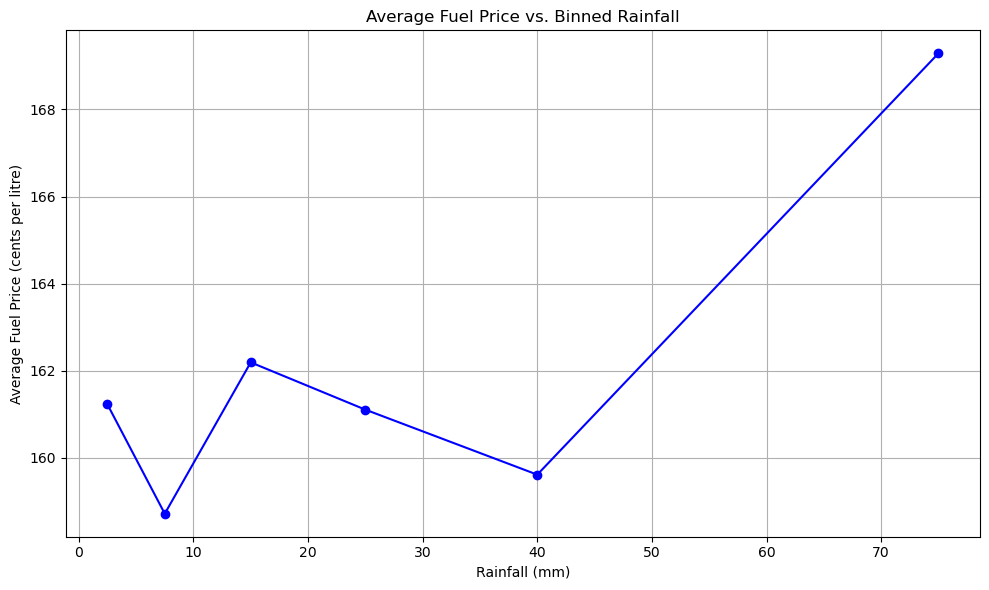

In [35]:
# Bin rainfall into ranges (e.g., 0–5 mm, 5–10 mm, etc.)
rainfall_bins = pd.cut(combined_df['rainfall'], bins=[0, 5, 10, 20, 30, 50, 100], right=False)

# Group data by rainfall bins and calculate average fuel price in each bin
binned_rainfall_data = combined_df.groupby(rainfall_bins)['PRODUCT_PRICE'].mean()

#  Plot the data
plt.figure(figsize=(10, 6))
plt.plot(binned_rainfall_data.index.categories.mid, binned_rainfall_data, marker='o', linestyle='-', color='blue')
plt.title('Average Fuel Price vs. Binned Rainfall')
plt.xlabel('Rainfall (mm)')
plt.ylabel('Average Fuel Price (cents per litre)')
plt.grid(True)
plt.tight_layout()
plt.show()


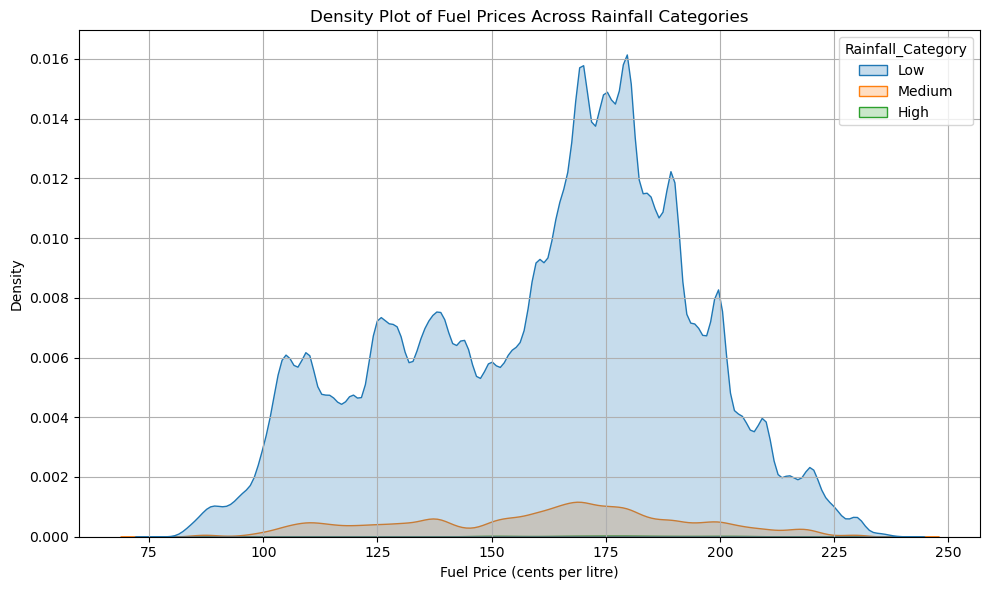

In [42]:

# Create rainfall categories again if needed
combined_df['Rainfall_Category'] = pd.cut(combined_df['rainfall'], 
                                          bins=[0, 10, 40, 100], 
                                          labels=['Low', 'Medium', 'High'],
                                          right=False)

# Create a density plot for fuel prices across different rainfall categories
plt.figure(figsize=(10, 6))
sns.kdeplot(data=combined_df, x='PRODUCT_PRICE', hue='Rainfall_Category', fill=True)
plt.title('Density Plot of Fuel Prices Across Rainfall Categories')
plt.xlabel('Fuel Price (cents per litre)')
plt.ylabel('Density')
plt.grid(True)
plt.tight_layout()
plt.show()


## Lagged Effect of Rainfall

In [36]:
# Shift rainfall data by 1 week to check if there's a delayed effect of rainfall on fuel prices
combined_df['rainfall_lag_1week'] = combined_df['rainfall'].shift(7)

# Calculate correlation between lagged rainfall and fuel prices
rainfall_lag_corr = combined_df[['rainfall_lag_1week', 'PRODUCT_PRICE']].corr()
print(rainfall_lag_corr)


                    rainfall_lag_1week  PRODUCT_PRICE
rainfall_lag_1week            1.000000      -0.000406
PRODUCT_PRICE                -0.000406       1.000000


The near-zero correlation suggests that rainfall, even with a delay, does not appear to have a significant effect on fuel prices in the dataset you're analyzing.

The lack of correlation across both immediate and lagged rainfall implies that rainfall might not be a direct factor influencing fuel prices, at least not in a linear or lagged fashion.